In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


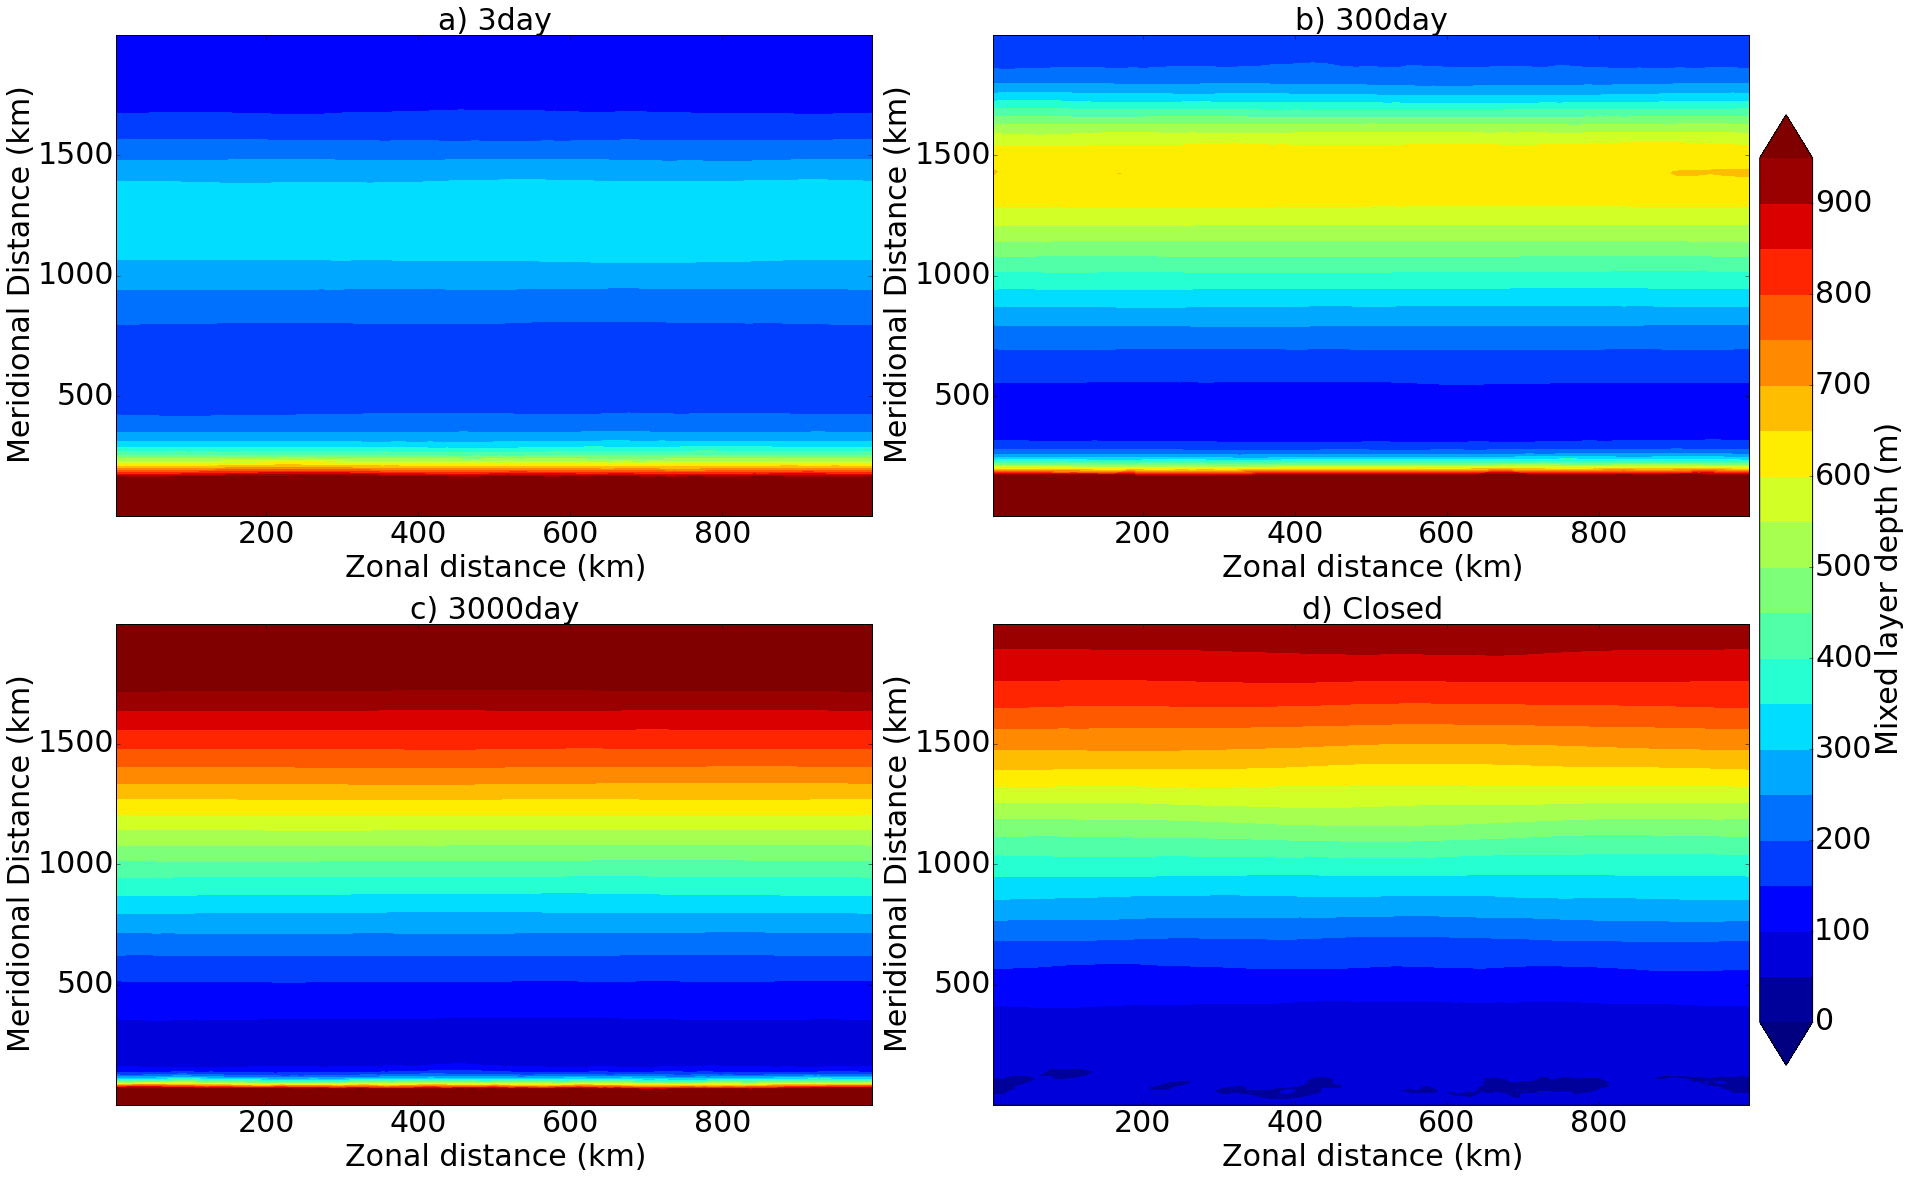

In [4]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0, 1000, 50)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))
    mld = c.mnc('MLD.nc','MXLDEPTH')

    
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                mld[0,:,:] , Psi_levs, cmap=cm.jet, extend='both')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Zonal distance (km)', fontsize=30)
    ax.set_ylabel('Meridional Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('Mixed layer depth (m)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

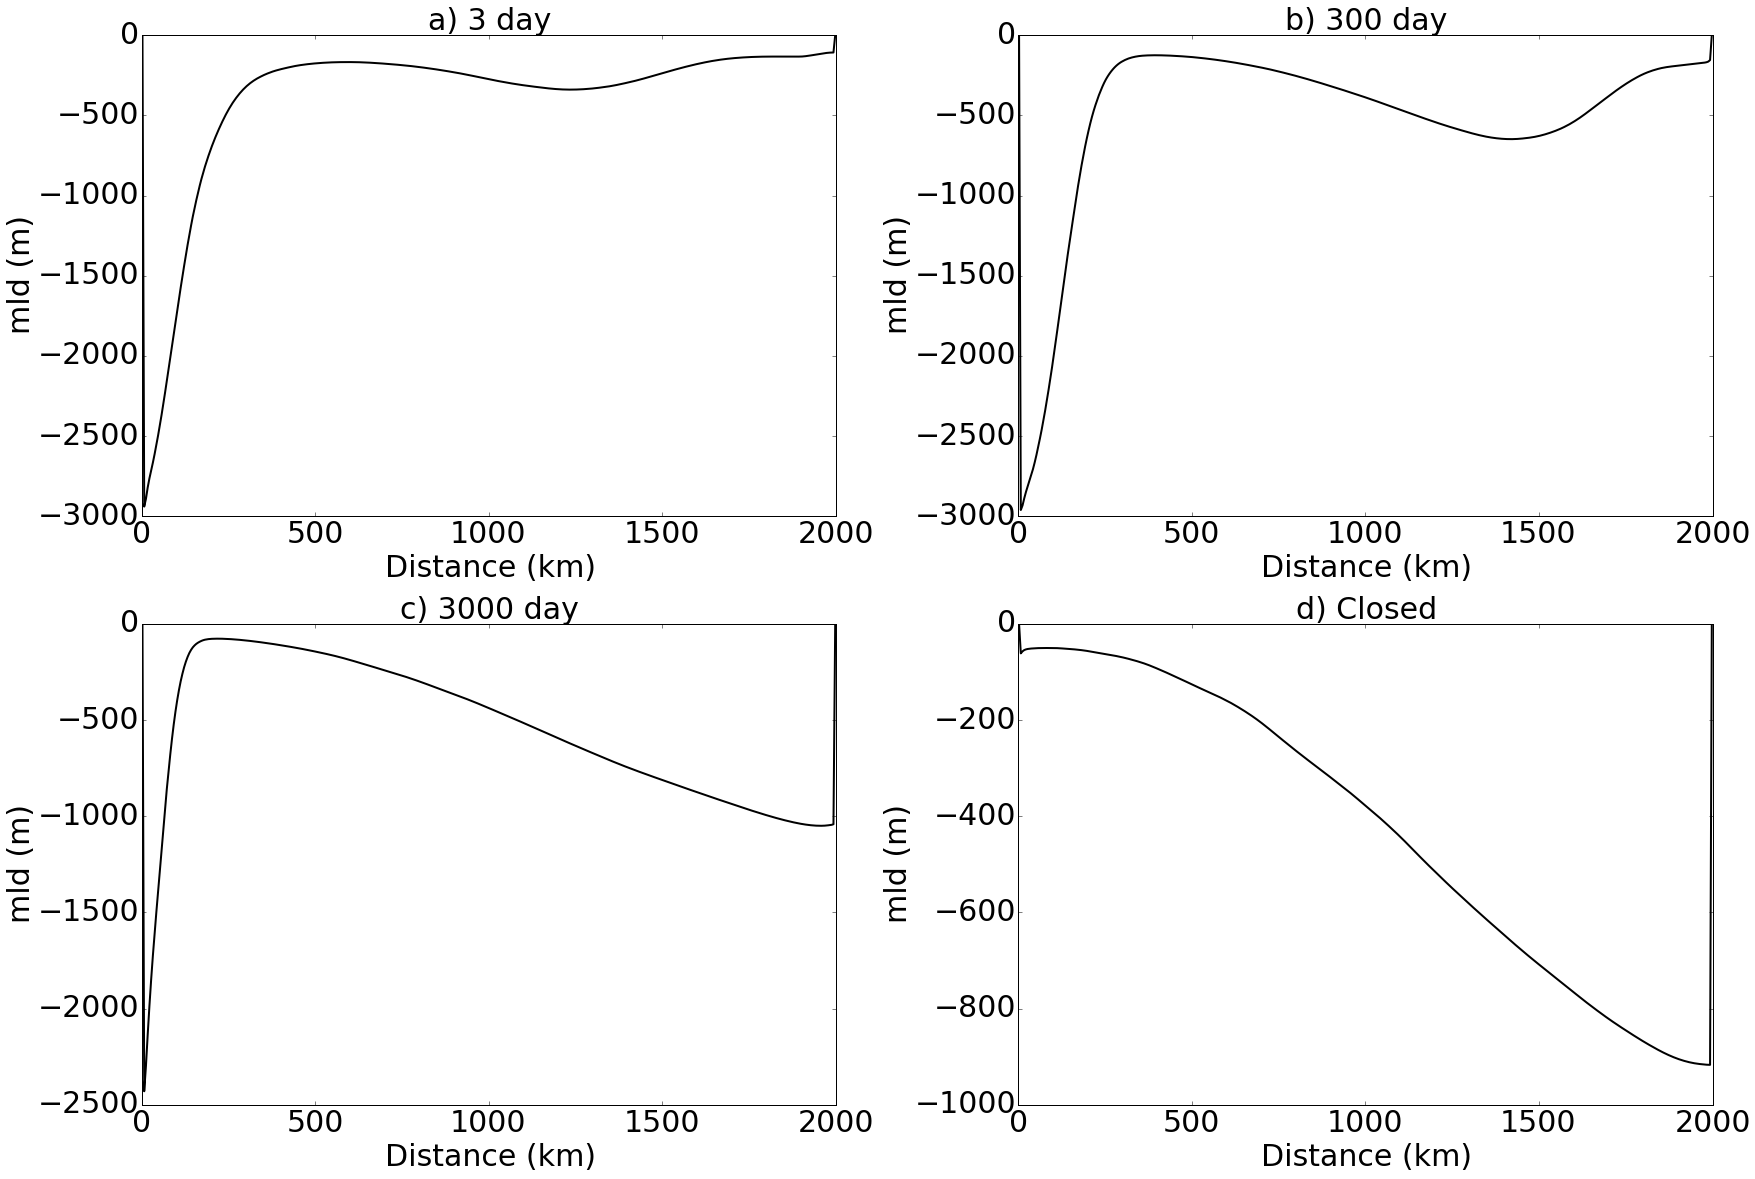

In [7]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
for i in range(len(Runs)):

    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))
    mld = c.mnc('MLD.nc','MXLDEPTH')

    
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.plot(c.yc/1000, -mld[0,:,:].mean(axis=1), 'k', linewidth='2')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+' day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('mld (m)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()

In [26]:
tau = ['4', '8', '16']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Vary_N/'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'CDT/MLD.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

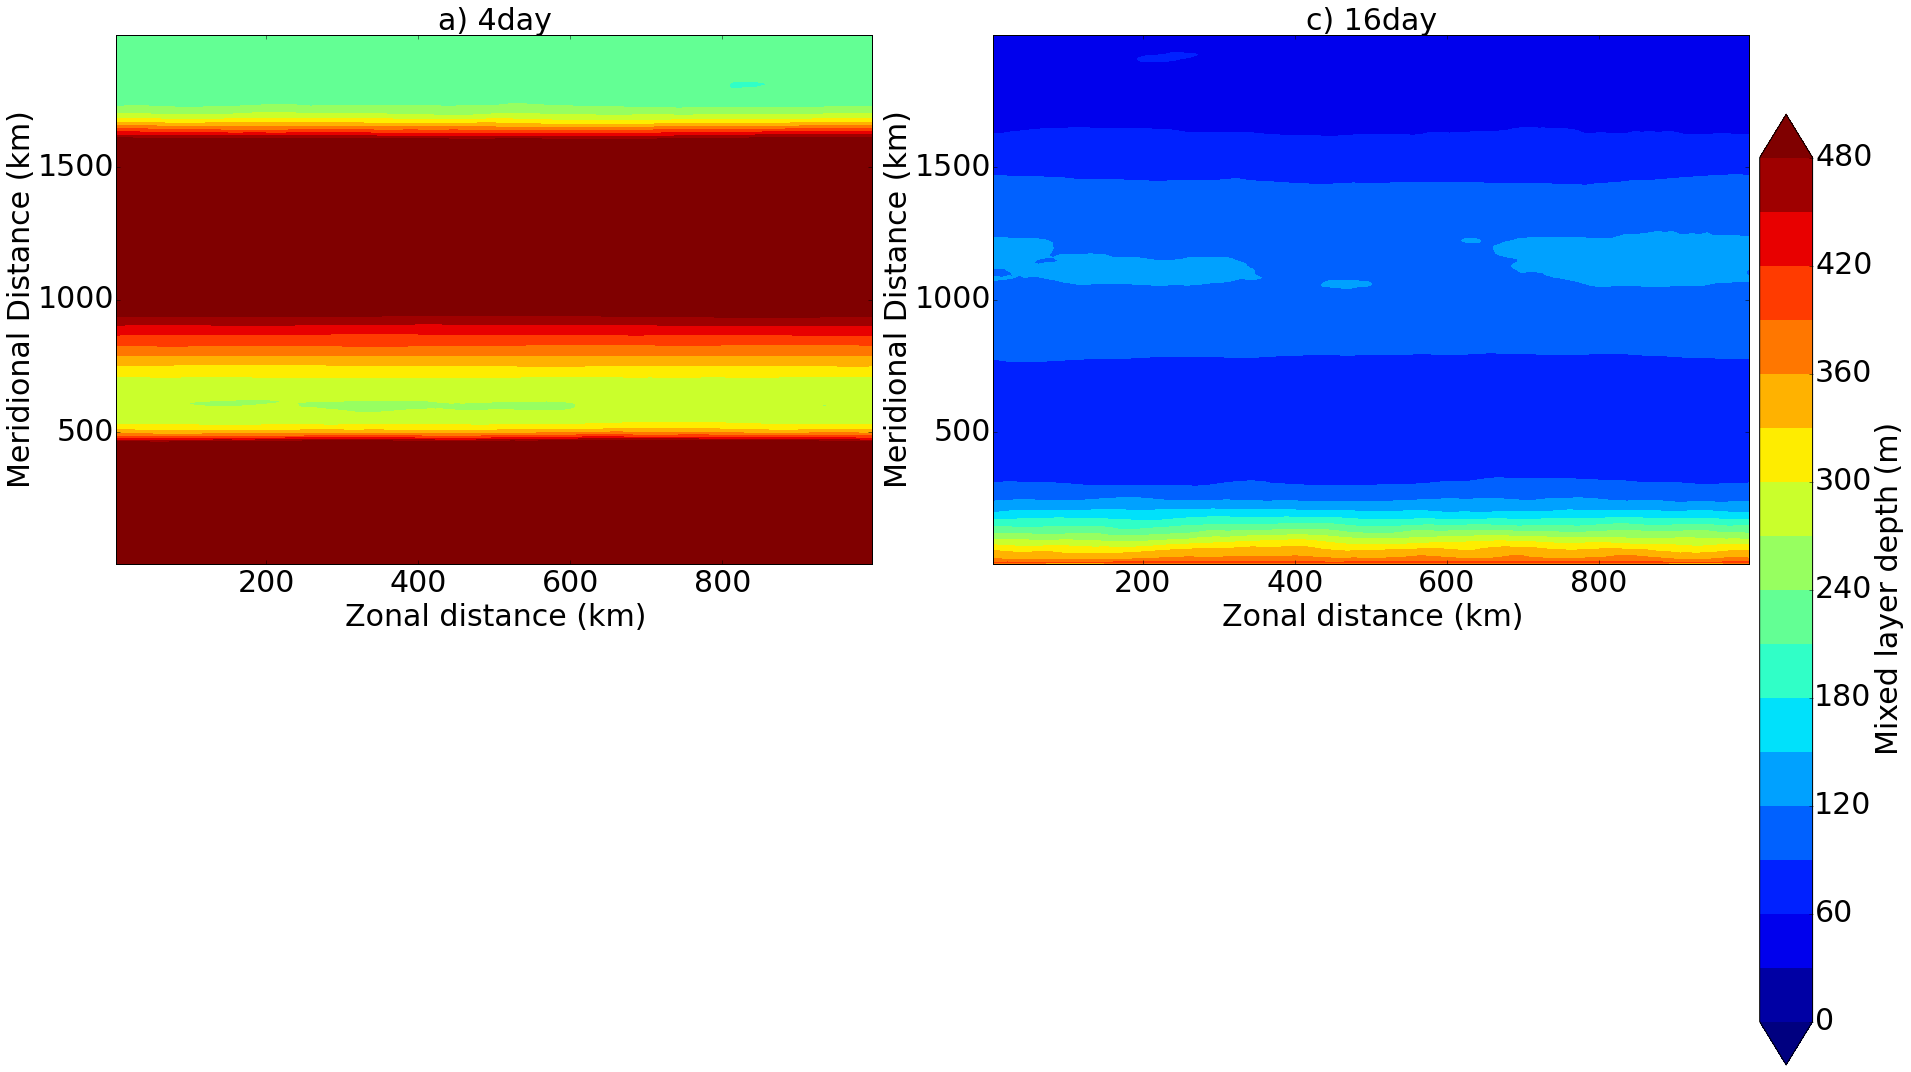

In [34]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
Psi_levs = np.arange(-0, 500, 30)
Psi_ticks =np.arange(0., 20., 4.)
Eddy_ticks = (np.arange(-3, 1, .5))
E_levs = np.arange(-3., 1, .25)
for i in range(len(Runs)):
    fname = x+str(tau[Runs[i]]+'CDT/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))
    mld = c.mnc('MLD.nc','MXLDEPTH')

    
    ax = fig.add_subplot(2, 2, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                mld[0,:,:] , Psi_levs, cmap=cm.jet, extend='both')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Zonal distance (km)', fontsize=30)
    ax.set_ylabel('Meridional Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('Mixed layer depth (m)', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

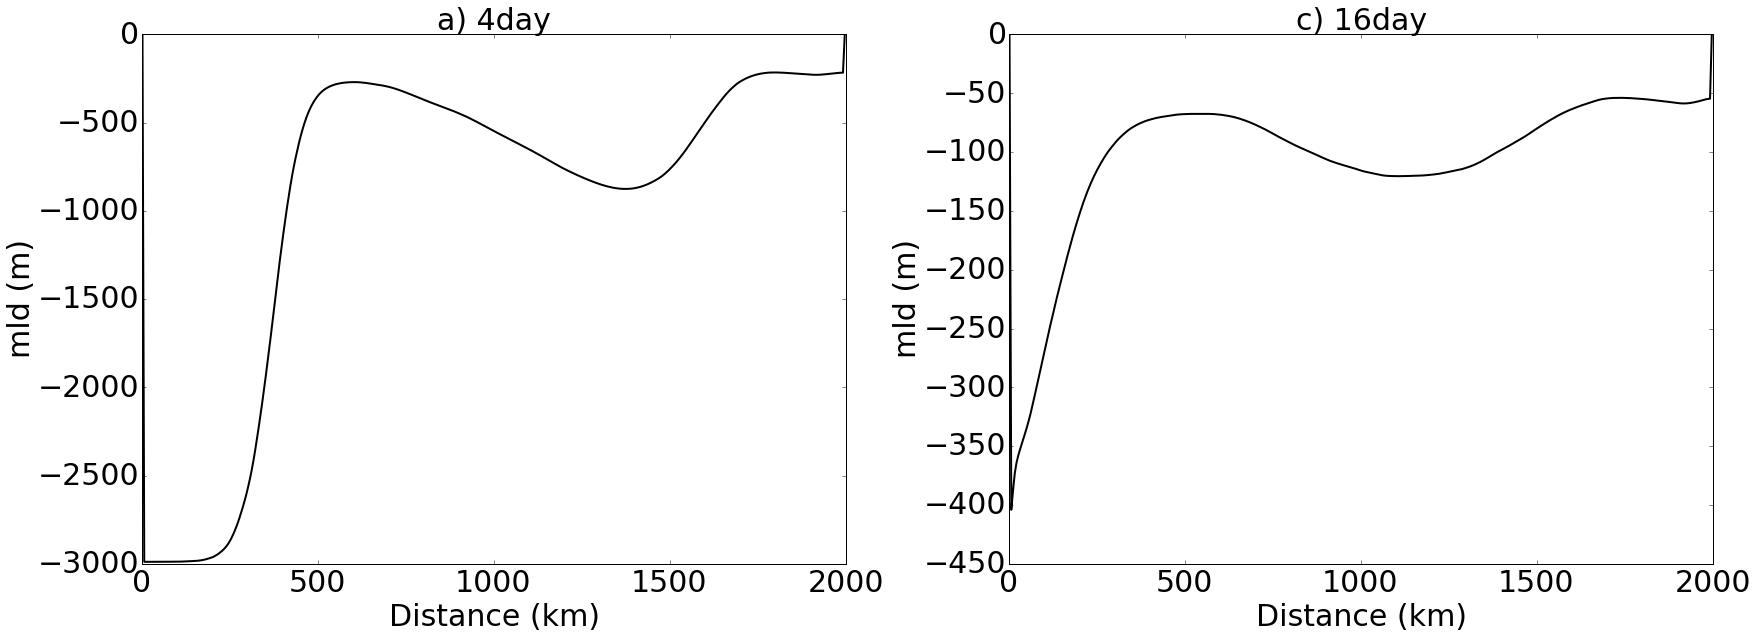

In [35]:
fig = plt.figure(figsize=(24.5, 16.5))
# Create Panels
for i in range(len(Runs)):
    fname = x+str(tau[Runs[i]]+'CDT/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELStile(self.dyc, (Nz,1))
    mld = c.mnc('MLD.nc','MXLDEPTH')

    
    ax = fig.add_subplot(2, 2, i+1)
    p = ax.plot(c.yc/1000, -mld[0,:,:].mean(axis=1), 'k', linewidth='2')

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('mld (m)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()